In [3]:
from google.colab import files
uploaded = files.upload()


Saving loan_prediction.csv to loan_prediction.csv


In [4]:
import pandas as pd

df = pd.read_csv("loan_prediction.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Dataset shape: (614, 13)

Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Data types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Target Distribution:
 Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


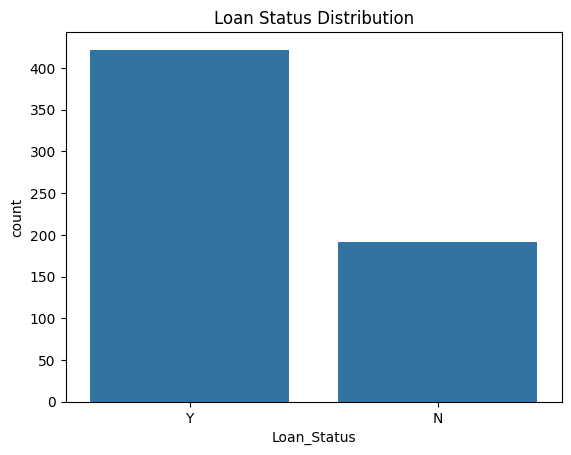


Accuracy: 0.8536585365853658

Confusion Matrix:
 [[21 17]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



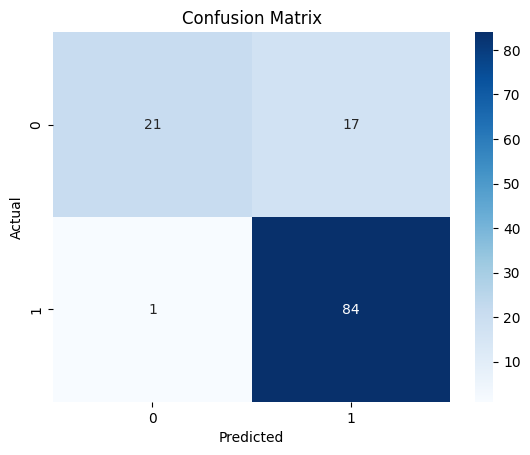


Prediction for sample application: Approved ✅


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Step 1: Load Dataset
df = pd.read_csv("loan_prediction.csv")  # Make sure the file is uploaded in Colab or present in the local directory

# ✅ Step 2: Exploratory Data Analysis (EDA)
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nTarget Distribution:\n", df['Loan_Status'].value_counts(normalize=True))

# Optional: Visualize target variable
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

# ✅ Step 3: Data Cleaning
# Fix FutureWarnings by assigning result instead of inplace=True
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Drop ID column
df.drop(columns='Loan_ID', inplace=True)

# ✅ Step 4: Feature Engineering
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], inplace=True)

# ✅ Step 5: Encoding Categorical Variables
le = LabelEncoder()

# Handle '3+' in Dependents before encoding
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# ✅ Step 6: Train-Test Split
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Step 8: Model Training
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# ✅ Step 9: Model Evaluation
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 10: Visualizing Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ✅ Step 11: Prediction Function for New Data
def predict_new_application(model, encoder, scaler, input_dict):
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Handle '3+' in Dependents
    input_df['Dependents'] = input_df['Dependents'].replace('3+', 3).astype(int)

    # Feature engineering
    input_df['Total_Income'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    input_df['LoanAmount_log'] = np.log(input_df['LoanAmount'])
    input_df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], inplace=True)

    # Encode categorical features
    for col in input_df.select_dtypes(include='object').columns:
        input_df[col] = encoder.fit_transform(input_df[col])

    # Reorder columns to match training data
    input_df = input_df[X.columns]

    # Scale the input
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_scaled)[0]
    return "Approved ✅" if prediction == 1 else "Not Approved ❌"

# ✅ Step 12: Example Prediction
sample_input = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'Credit_History': 1.0,
    'Property_Area': 'Urban',
    'Loan_Amount_Term': 360.0,
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150
}

result = predict_new_application(model, le, scaler, sample_input)
print("\nPrediction for sample application:", result)
